In [1]:
from sklearn import model_selection, datasets, metrics, neighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

За основу для отрисовки возьмем ноутбук с семинара

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
colors = ListedColormap(['red', 'yellow', 'green', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightyellow', 'lightgreen', 'lightblue'])

In [4]:
def plot_2d_dataset(data, colors):
    plt.figure(figsize=(8, 8))
    plt.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c = data[1], cmap = colors)

In [5]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [6]:
def plot_decision_surface(estimator, data, labels, k,
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(data, labels)
    
    #set figure size
    plt.figure(figsize = (14, 8))
    
    #plot decision surface on the train data 
    xx, yy = get_meshgrid(data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(data[:, 0], data[:, 1], c = labels, s = 100, cmap = colors)
    plt.title('k = {}'.format(k))
    plt.show()

### Сгенерируем выборку

In [7]:
dataset = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, 
                                       n_samples=1000, n_classes=4, n_clusters_per_class=1, random_state=95)

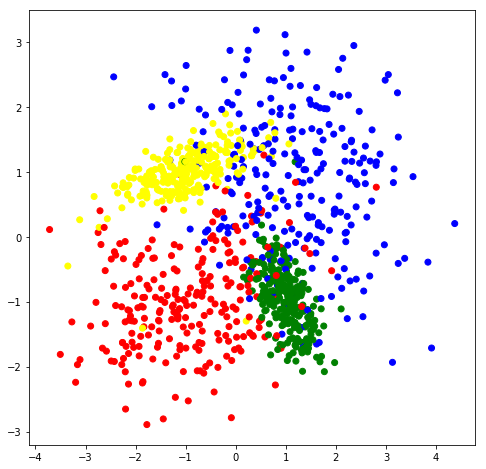

In [8]:
plot_2d_dataset(dataset, colors)

### Разделяющие поверхности для разных k

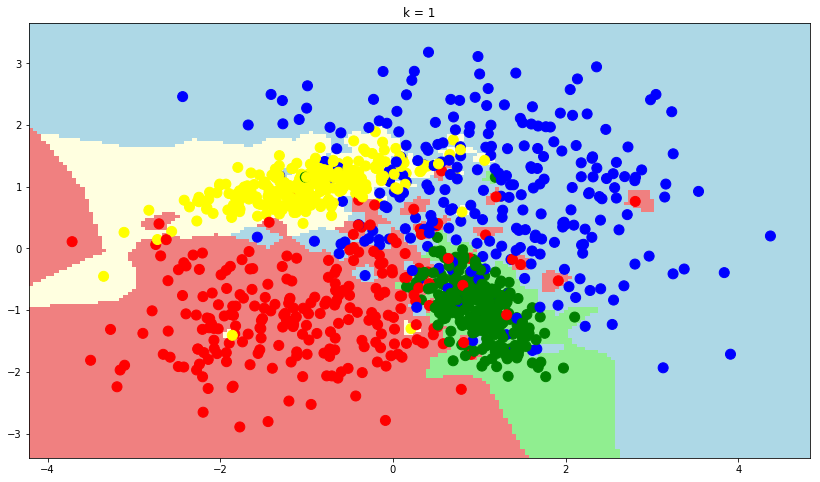

In [9]:
k = 1
estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
plot_decision_surface(estimator, dataset[0], dataset[1], k)

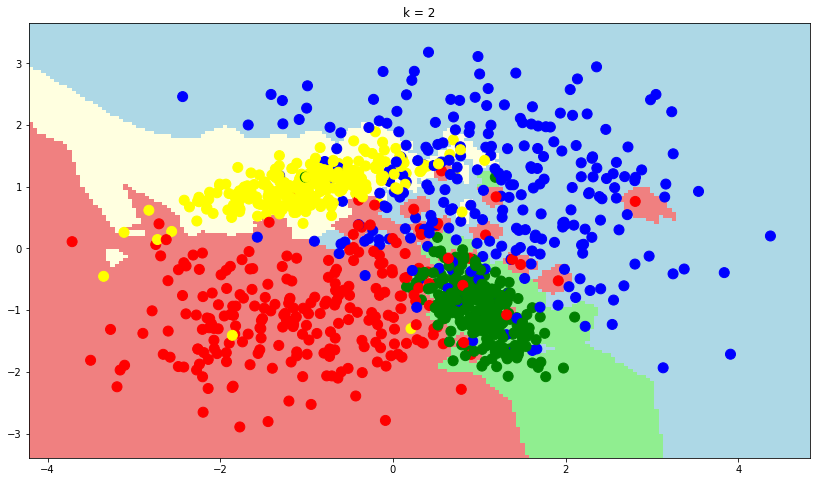

In [10]:
k = 2
estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
plot_decision_surface(estimator, dataset[0], dataset[1], k)

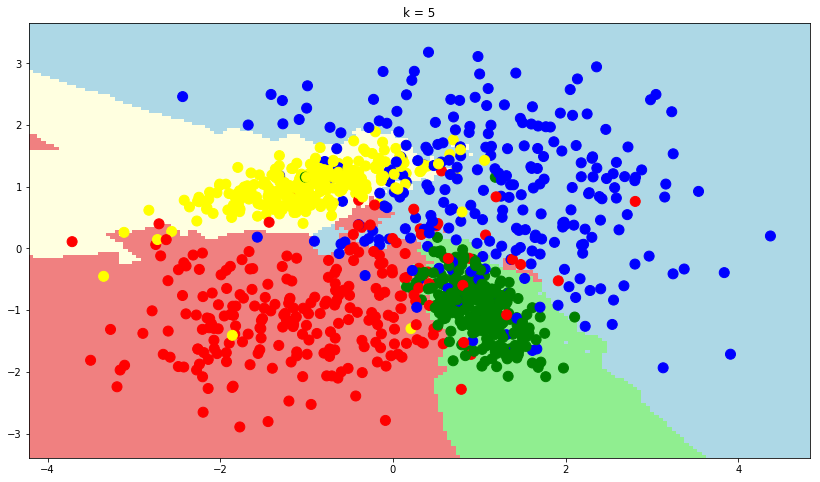

In [11]:
k = 5
estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
plot_decision_surface(estimator, dataset[0], dataset[1], k)

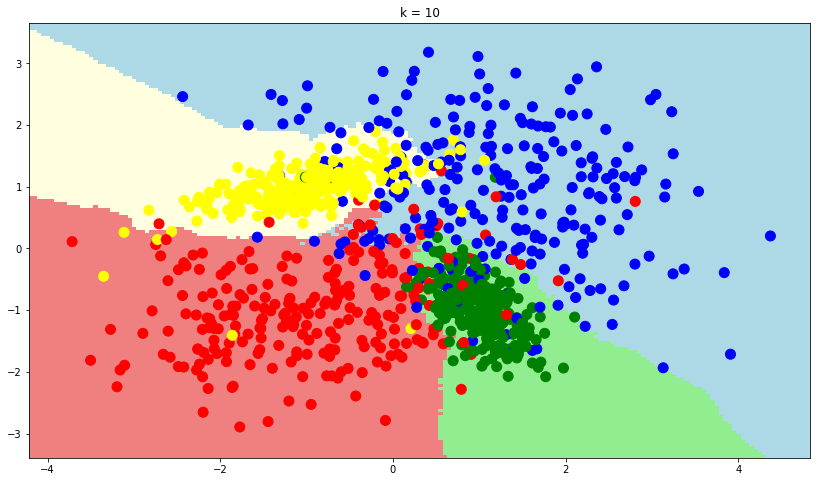

In [12]:
k = 10
estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
plot_decision_surface(estimator, dataset[0], dataset[1], k)

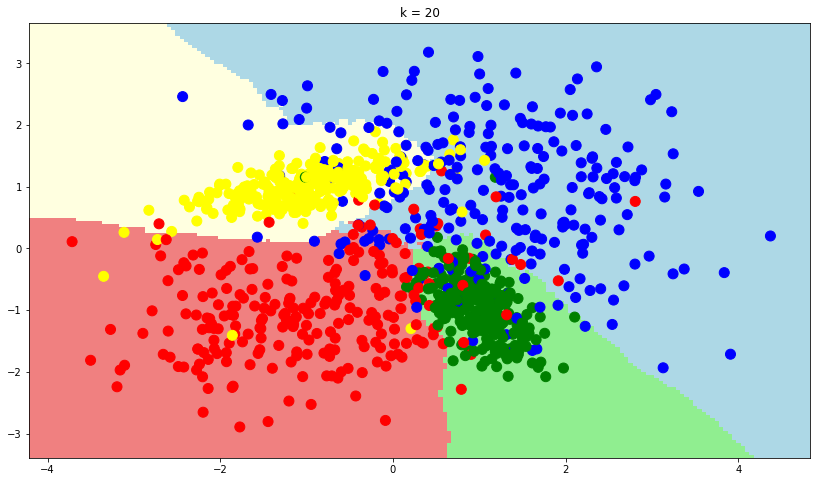

In [13]:
k = 20
estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
plot_decision_surface(estimator, dataset[0], dataset[1], k)

Как видно с увеличением k классификатор все меньше подвержен воздействию единичных выбросов.

### Поиск наилучшего k

In [27]:
def result(estimator, dataset):
    results = []
    for train_id, test_id in model_selection.KFold(n_splits=5, shuffle=True, random_state=298).split(dataset[0]):
        test_data = dataset[0][test_id]
        test_labels = dataset[1][test_id]
        train_data = dataset[0][train_id]
        train_labels = dataset[1][train_id]
        estimator.fit(train_data, train_labels)
        results.append(metrics.accuracy_score(test_labels, estimator.predict(test_data)))
    return np.average(results)

In [28]:
x = range(1, 100)
y = [result(neighbors.KNeighborsClassifier(n_neighbors=k), dataset) for k in xrange(1, 100)]

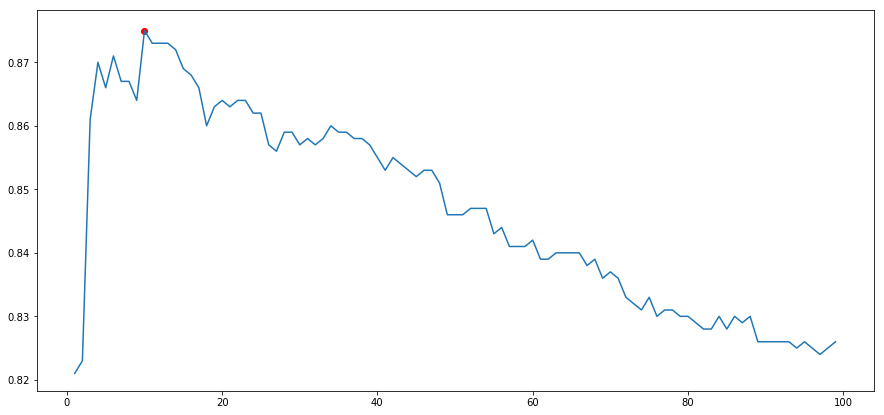

In [29]:
plt.figure(figsize=(15,7))
plt.plot(x,y)
x_best = np.argmax(y)
plt.scatter(x_best+1, y[x_best], c='r')
plt.show()

In [30]:
print 'best k = {}, with accuracy = {}'.format(x_best, y[x_best])

best k = 9, with accuracy = 0.875
